In [1]:
%matplotlib inline
import numpy
import matplotlib.pyplot as plt
from astropy import units
from astropy import constants as const

# Optional:
from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('svg')

#### General Klein-Nishina cross section

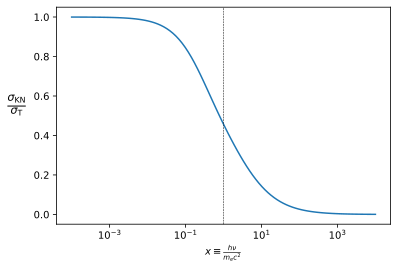

In [12]:
def sigma_kn(x):
    """
    Total Klein-Nishina cross section,
    normalised by Thomson cross section
    """
    s = 3./4 * (1 + x) / x**3 * (2 * x * (1 + x) / (1 + 2 * x) - numpy.log(1 + 2 * x))
    s += numpy.log(1 + 2 * x) / (2 * x) - (1 + 3 * x)/(1 + 2 * x)**2
    return s

x = numpy.logspace(-4, 4, 100)
fig, ax = plt.subplots()
ax.plot(x, sigma_kn(x))
ax.set_xlabel(r'$x\equiv\frac{h\nu}{m_e c^2}$')
ax.set_ylabel(r'$\frac{\sigma_\mathrm{KN}}{\sigma_\mathrm{T}}$', rotation=0, labelpad=16, fontsize=16);
ax.axvline(x=1, ls='--', color='k', lw=0.5)
ax.set_xscale('log');

Now as function of wavelength

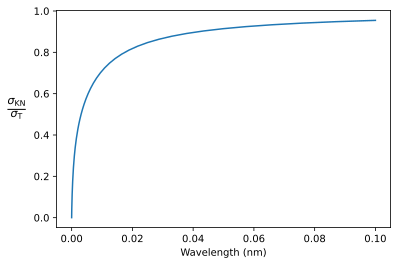

In [11]:
waves = numpy.logspace(-13, -1, 200) * units.nm
x = ((const.h / (const.m_e * const.c * waves)).to(''))

fig, ax = plt.subplots()
ax.plot(waves, sigma_kn(x))
ax.set_xlabel(r'Wavelength (nm)')
ax.set_ylabel(r'$\frac{\sigma_\mathrm{KN}}{\sigma_\mathrm{T}}$', rotation=0, labelpad=16, fontsize=16);

Classical scattering cross section as function of angular frequency

In [15]:
def scatt(omega, omega0, gamma=1):
    """
    Returns the cross section normalised by the Thomson cross section
    for omega, omega0 and gamma (damping coefficient).
    """
    return omega**4 / ((omega**2 - omega0**2)**2 + gamma**2 * omega**2)

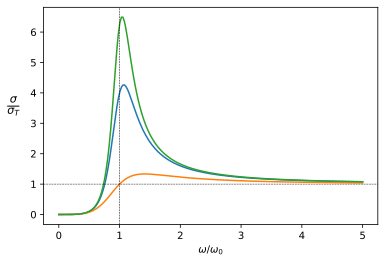

In [16]:
fig, ax = plt.subplots()

omega0 = 2
omega = numpy.linspace(0, 10, 200)
ax.plot(omega / omega0, scatt(omega, omega0, 1))
ax.plot(omega / omega0, scatt(omega, omega0, 2))
ax.plot(omega / omega0, scatt(omega, omega0, 0.8))
plt.axvline(x=1, color='k', ls='--', lw=0.5)
plt.axhline(y=1, color='k', ls='--', lw=0.5)
plt.xlabel(r'$\omega/\omega_0$')
plt.ylabel(r'$\frac{\sigma}{\sigma_T}$', rotation=0, labelpad=16, fontsize=16);